# Lab 8 : Star Formation 

In [13]:
import numpy as np
from astropy import units as u
from astropy import constants as const

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

# Part A

Create a function that returns the SFR for a given luminosity (NUV, FUV, TIR, Halpha)

$Log( {\rm SFR} (M_\odot/year)) = Log(Lx (erg/s)) - Log(Cx)$ 

Including corrections for dust absorption 

Kennicutt & Evans 2012 ARA&A Equation 12 and Table 1, 2

In [37]:
# Fct that return the star formation rate given the L of the galaxy
def Starformationrate(L, Type, Tir) :
    """Compute star formation rate of a galaxy following K&E 2012 eq 12
    Inputs : 
        L = Luminosity
        Type = string that list the wavelength (FUV, NUV, TIR, Halpha)
    Returns : 
        log of the star Formation rate (Msun/year)"""
    
    if (Type == 'Fuv') :
        logCx = 43.35 # Calibration from L to SFR from table 1 (K&E 2012)
        Tirc = 0.46 # correction for dust absorption from table 2
    elif (Type == 'Nuv'):
        logCx = 43.17
        Tirc = 0.27
    elif (Type == 'Halpha'):
        logCx = 41.27
        Tirc = 0.0024
    elif (Type == 'Tir'):
        logCx = 43.41
        Tirc = 0
    else :
        print("Missing Wavelength : FUV, NUV, Halpha, TIR")
    
    #correct the L for dust
    Lnew = L + Tirc*Tir
    
    return np.log10(Lnew) - logCx

Let's try to reproduce SFRs derived for galaxies from UV luminosities measured with Galex. 

Using Table 1 from Lee et al. 2009
https://ui.adsabs.harvard.edu/abs/2009ApJ...706..599L/abstract

We will use galaxy properties from NED:
https://ned.ipac.caltech.edu/

In [38]:
Lsunergs = const.L_sun.to(u.erg/u.s).value

In [39]:
#  WLM Dwarf Irregular Galaxy
#Log(SFR) from UV is 2.21 (Lee & Al 2009)
#From Ned WLM NUV L GALEX 1.71e7 Msun
#From NED WLM NIR L IRAC 2.48e6 Lsun

NUV_WLM = 1.71e7*Lsunergs
TIR_WLM = 2.48e6*Lsunergs

Starformationrate(NUV_WLM, 'Nuv', TIR_WLM)


-2.3373504191027266

In [44]:
# NGC 24 Sc galaxy
# Lee&Al 2009 log(SFR) derived from UV as -0.7
# From NED : NGC 24 NUV L GAlex 2.9e8 Lsun
# From NED : NGC 24 NUV L Mips 3.09e8 Lsun
# From NED : NGC 24 NUV L 2Mass 8.34e8 Lsun

NUV_N24 = 2.96e8*Lsunergs
TIR_N24 = 3.09e8*Lsunergs + 8.34e8*Lsunergs

Starformationrate(NUV_N24, 'Nuv', TIR_N24)

-0.8055527449424105

# Part B Star formation main sequence

Write a function that returns the average SFR of a galaxy at a given redshift. 

What is the average SFR of a MW mass galaxy today? at z=1?

Plot the SFR main sequence for a few different redshifts.


From Whitaker 2012:

log(SFR) = $\alpha(z)({\rm log}M_\ast - 10.5) + \beta(z)$

$\alpha(z) = 0.7 - 0.13z$

$\beta(z) = 0.38 + 1.14z - 0.19z^2$

In [53]:
"""Create a fct that return the star formation rate main sequence"""
def SFRmainsequence(Mstar, z) :
    """Average SFR as a fct of stlar mass & z
    input :
        z = redshift
        Mstar = stellar mass of galaxy in Msun
    Return :
        log(SFR) (Msun/year)"""
    alpha = 0.7 - 0.13*z
    beta = 0.38 + 1.14*z - 0.19*z**2
    
    return alpha*(np.log10(Mstar)- 10.5) + beta

In [54]:
# MW at z=0
10**SFRmainsequence(6e10,0)

3.7558295562247412

In [56]:
# MW at z = 1
10**SFRmainsequence(6e10,4)

89.13889068294495

In [60]:
# create an array of stellar masses
Mass = np.linspace(1e9, 1e12)

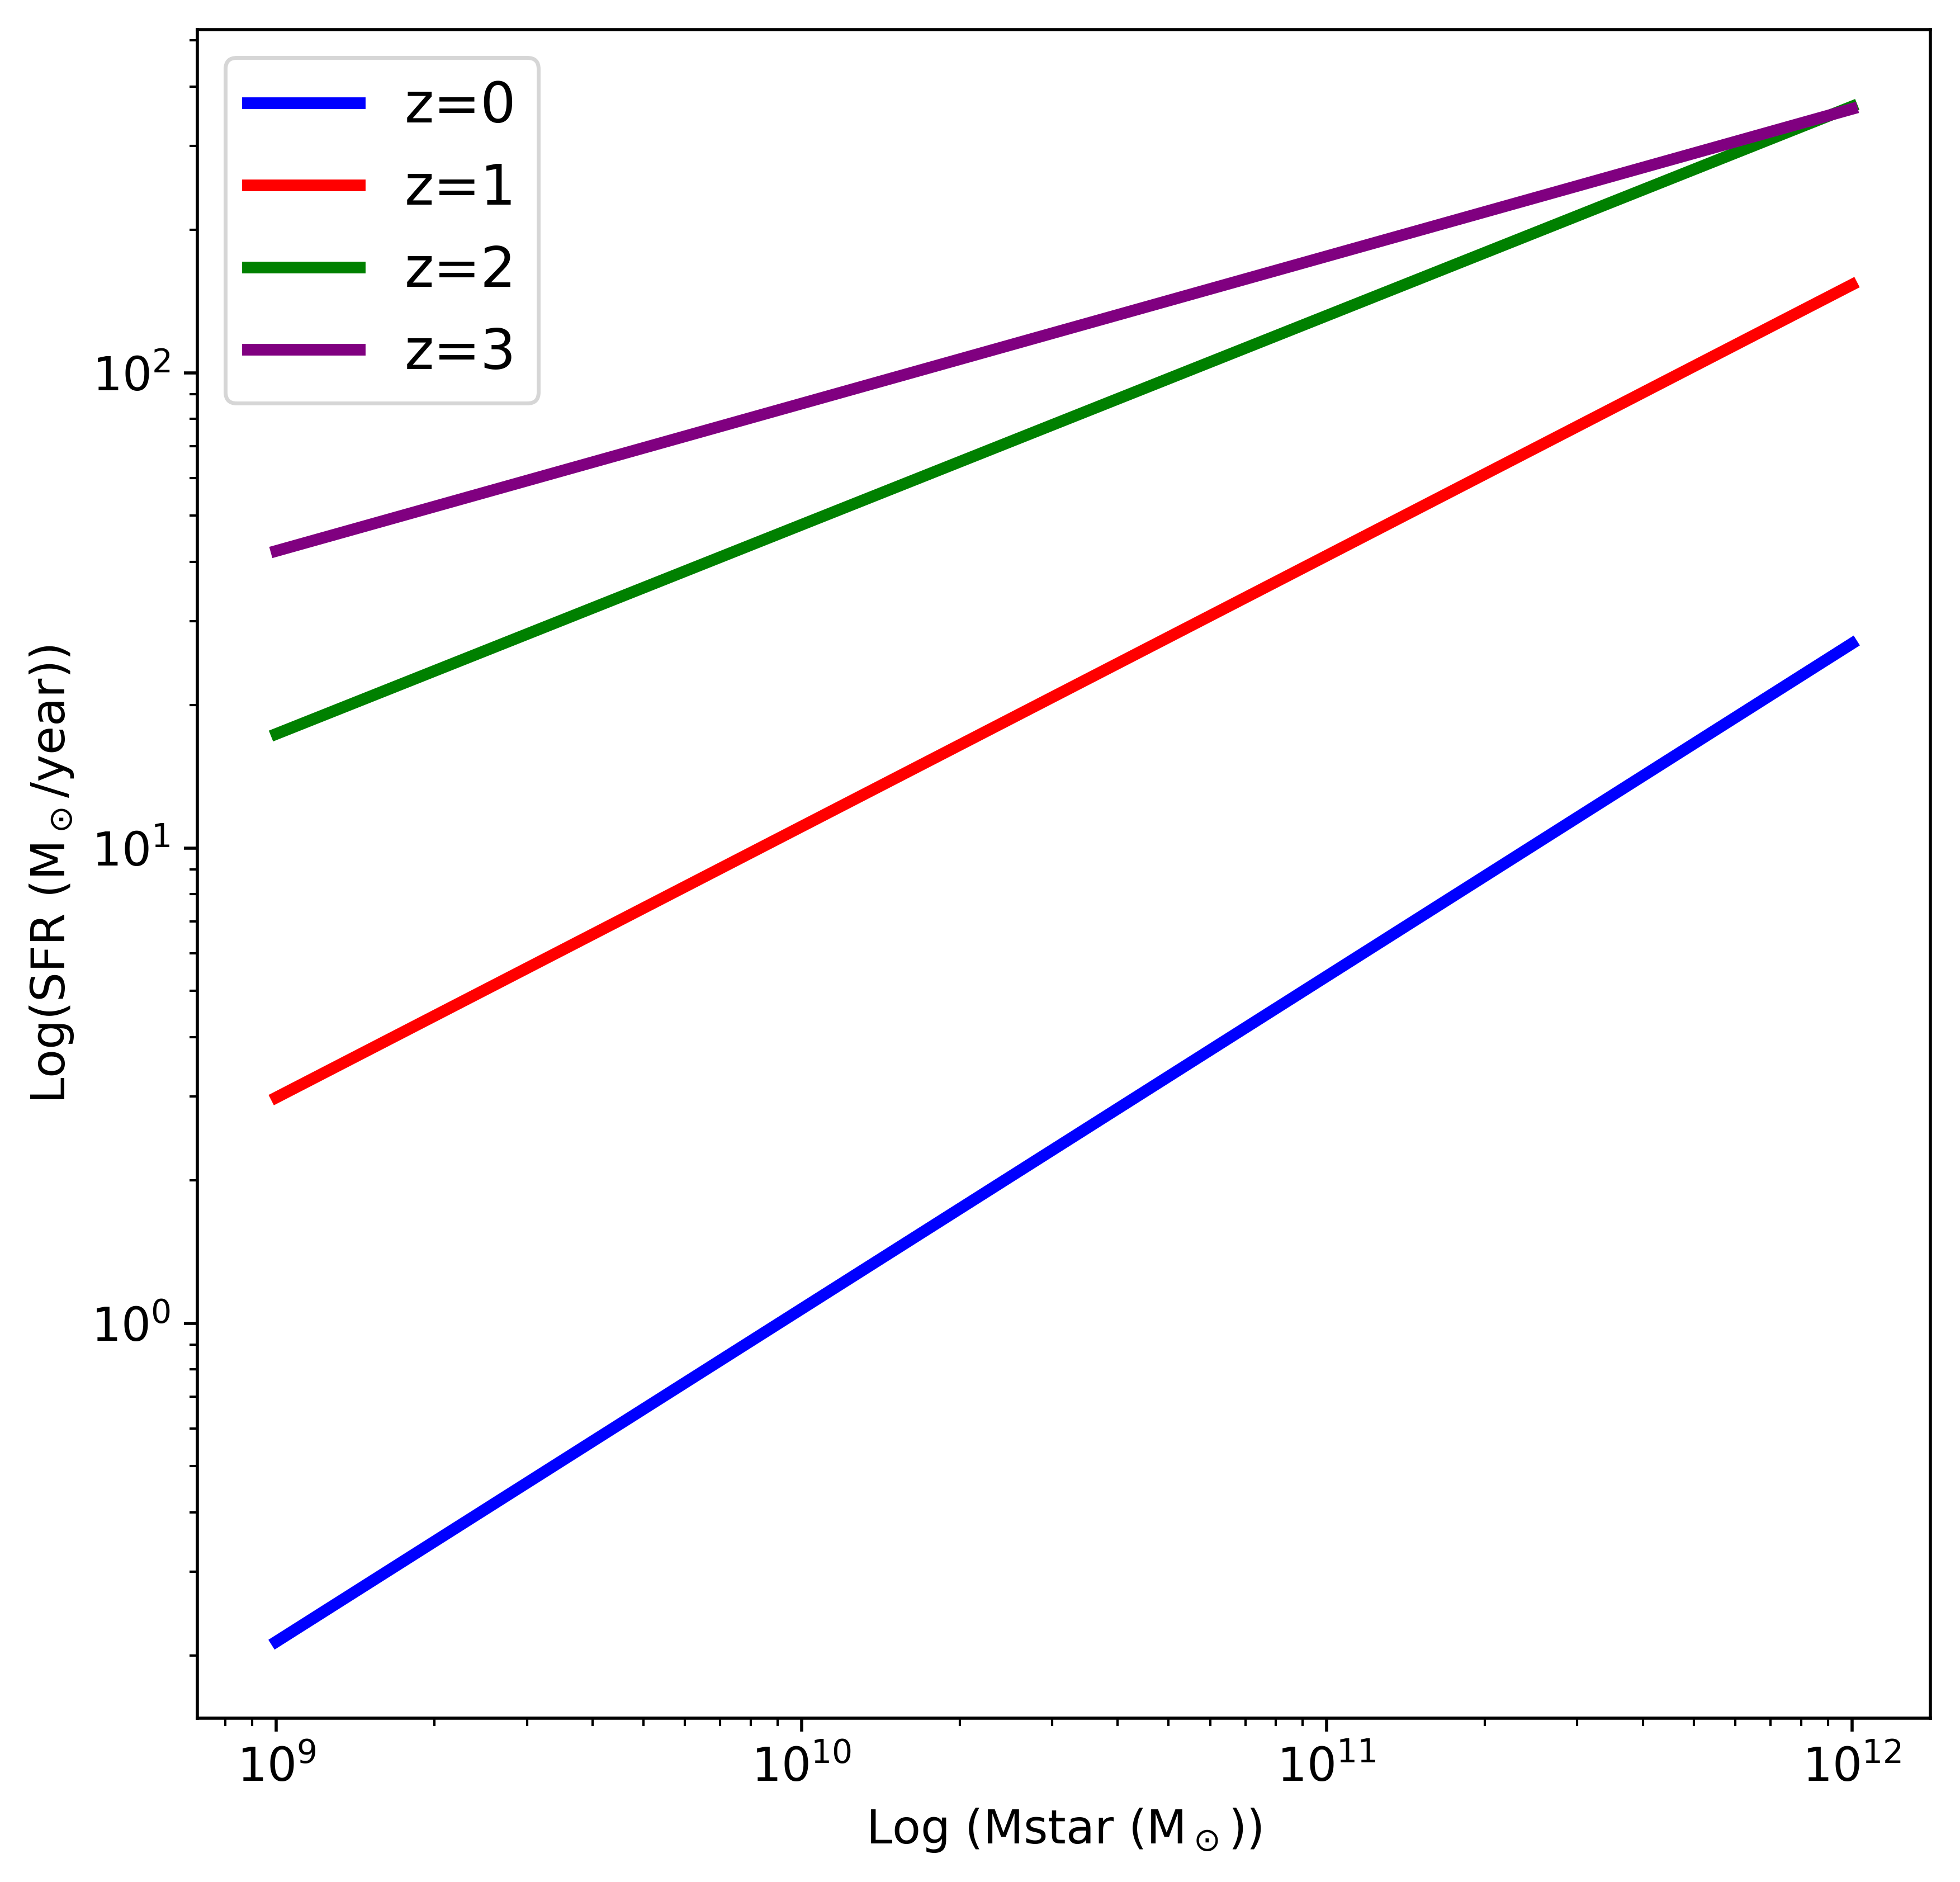

In [63]:

fig = plt.figure(figsize=(8,8), dpi=500)
ax = plt.subplot(111)

# add log log plots

plt.loglog(Mass, 10**SFRmainsequence(Mass,0), color='blue', linewidth=3, label='z=0')
plt.loglog(Mass, 10**SFRmainsequence(Mass,1), color='red', linewidth=3, label='z=1')
plt.loglog(Mass, 10**SFRmainsequence(Mass,2), color='green', linewidth=3, label='z=2')
plt.loglog(Mass, 10**SFRmainsequence(Mass,3), color='purple', linewidth=3, label='z=3')

# Add axis labels
plt.xlabel('Log (Mstar (M$_\odot$))', fontsize=12)
plt.ylabel('Log(SFR (M$_\odot$/year))', fontsize=12)


#adjust tick label font size
label_size = 12
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# add a legend with some customizations.
legend = ax.legend(loc='upper left',fontsize='x-large')


# Part C  Starbursts

What are the star formation rates for :

LIRG: $10^{11}$ L$_\odot$

ULIRG: $10^{12} $ L$_\odot$

HLIRG: $10^{13} $ L$_\odot$

In [ ]:
# normal galaxies 


In [ ]:
# LIRGs  


In [ ]:
# ULIRGs

In [ ]:
# HLIRGs